# Data Exploration & Cleaning


|Num|Field|Description|
|---|-----|----------|
|1 | school | student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira) |
|2 | sex | student's sex (binary: "F" - female or "M" - male)|
|3 | age | student's age (numeric: from 15 to 22) |
|4 | address | student's home address type (binary: "U" - urban or "R" - rural) |
|5 | famsize | family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3) |
|6 | Pstatus | parent's cohabitation status (binary: "T" - living together or "A" - apart)|
|7 | Medu | mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) |
|8 | Fedu | father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) |
|9 | Mjob | mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")|
|10| Fjob | father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")|
|11 | reason | reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")|
|12 | guardian | student's guardian (nominal: "mother", "father" or "other")|
|13 | traveltime | home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)|
|14 | studytime | weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)|
|15 | failures | number of past class failures (numeric: n if 1<=n<3, else 4)|
|16 | schoolsup | extra educational support (binary: yes or no)|
|17 | famsup | family educational support (binary: yes or no)|
|18 | paid | extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)|
|19 | activities | extra-curricular activities (binary: yes or no)|
|20 | nursery | attended nursery school (binary: yes or no)|
|21 | higher | wants to take higher education (binary: yes or no)|
|22 | internet | Internet access at home (binary: yes or no)|
|23 | romantic | with a romantic relationship (binary: yes or no)|
|24 | famrel | quality of family relationships (numeric: from 1 - very bad to 5 - excellent)|
|25 | freetime | free time after school (numeric: from 1 - very low to 5 - very high)|
|26 | goout | going out with friends (numeric: from 1 - very low to 5 - very high)|
|27 | Dalc | workday alcohol consumption (numeric: from 1 - very low to 5 - very high)|
|28 | Walc | weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)|
|29 | health | current health status (numeric: from 1 - very bad to 5 - very good)|
|30 | absences | number of school absences (numeric: from 0 to 93)|
|31 | G1 | first period grade (numeric: from 0 to 20) |
|31 | G2 | second period grade (numeric: from 0 to 20) |
|32 | G3 | final grade (numeric: from 0 to 20, output target)


* Note - Lots of ordinal variables. Estimates of conditional probabilities rather than conditional means.

In [78]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
from typing import Union, Dict, Optional, List

%matplotlib inline
sns.set(style='dark')

In [111]:
def annotate(axes:Union[np.ndarray, plt.Axes]):
    '''
    annotate a singular ax or a matrix of subplots ax
    inputs: 
        axes: singular matplotlib.pyplot ax or a matrix or ax
    '''
    def _annotate(ax: plt.Axes):
        for p in ax.patches:

            # establish text position
            _horizontal_position = p.get_x() + p.get_width() / 2
            _vertical_position = p.get_y() + p.get_height() / 2

            # define the value to add to the graph
            value = f'{int(p.get_height())}' 

            # add text
            ax.text(_horizontal_position, _vertical_position, value,  ha="center", fontsize=12) 
            pass
    
    if isinstance(axes, np.ndarray):
        for _, ax in np.ndenumerate(axes):
            _annotate(ax)
    else:
        _annotate(axes)
    pass


def test_hypothesis(alpha: float, pvalue: float) -> str:
    '''
    returns whether to reject or not reject an hypothesis.
    inputs:
        alpha: string, level of confidence (probability of rejecting the null hypothesis when in fact it is true)
        pvalue: string, probability of getting a more extreme value when the null hypothesis is true.
    '''
    if pvalue > alpha:
        return 'Fail to reject hypothesis'
    else:
        return 'Reject hypothesis'

In [93]:
RAW_PATH = '../data/raw/student-mat.csv'
raw = pd.read_csv(RAW_PATH, sep=';')
processed = raw.copy(deep=True)

# create a figures folders if it doesn't exist
os.chdir('..') # change cwd to root
cwd = os.getcwd()
figures = os.path.join(cwd, 'figures')

if not os.path.exists(figures):
    os.makedirs('figures')
    
os.chdir('notebooks') # change the current working directory back to the notebooks folder

In [5]:
raw.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

* There are 395 students in the dataset
* There are no missing values in the dataset
* There are no missing values in the dataset

In [7]:
target_columns = ['G1', 'G2', 'G3']
raw[target_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
G1,395.0,10.908861,3.319195,3.0,8.0,11.0,13.0,19.0
G2,395.0,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0
G3,395.0,10.415190,4.581443,0.0,8.0,11.0,14.0,20.0


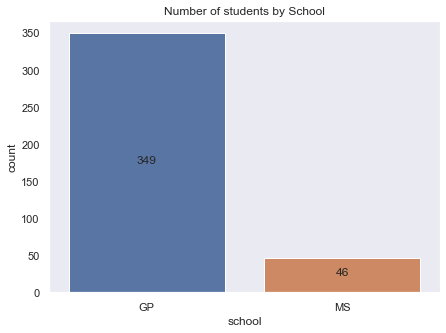

In [8]:
# look at the distribution of students between the schools
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=raw, x='school')
ax.set_title('Number of students by School')

# annotate the figure
annotate(ax)
plt.show()

* Gabriel Pereira school is represented 7~ times more than Mousinho da Silveira.

## Does Gender Affect the Final Grade

In [32]:
girls = raw.loc[raw['sex'] == 'F']
boys = raw.loc[raw['sex'] != 'F']

In [103]:
raw.groupby('sex').agg({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'}).rename(columns={
    'G1': 'First Semester',
    'G2': 'Second Semester',
    'G3': 'Final'
})

,First Semester,Second Semester,Final
sex,,,
F,10.620192,10.389423,9.966346
M,11.229947,11.074866,10.914439


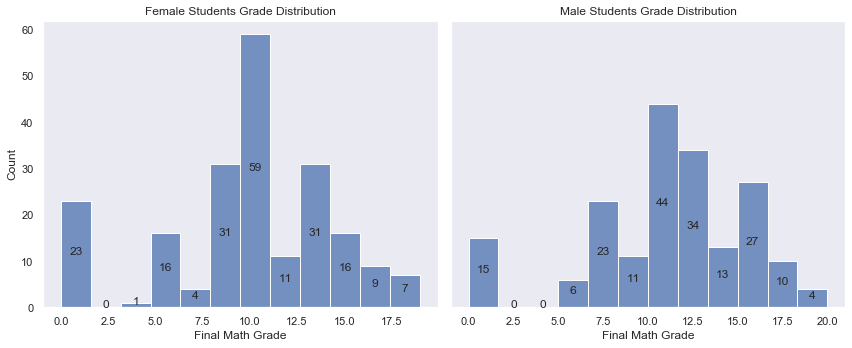

In [99]:
# look at the grade distribution between genders
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax = ax.ravel()

# add girls final grade histogram to figure
sns.histplot(data=girls, x='G3', ax=ax[0])
ax[0].set_title('Female Students Grade Distribution')
ax[0].set_xlabel('Final Math Grade')

# add boys final grade histogram to figure
sns.histplot(data=boys, x='G3', ax=ax[1])
ax[1].set_title('Male Students Grade Distribution')
ax[1].set_xlabel('Final Math Grade')

# annotate the figure
annotate(ax)
plt.tight_layout()
plt.savefig('../figures/gender_separeated_grade_hist.jpg')

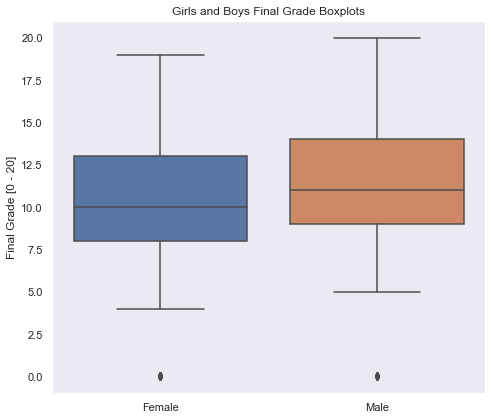

In [100]:
plt.figure(figsize=(7, 6))
ax = sns.boxplot(data=raw, x='sex', y='G3')

# update the labels
ax.set_title('Girls and Boys Final Grade Boxplots')
ax.set_xticklabels(['Female', 'Male'])
ax.set_ylabel('Final Grade [0 - 20]')
ax.set_xlabel('')

plt.tight_layout()
plt.savefig('../figures/gender_separeated_grade_boxplot.jpg')

### Are boys in these schools better than girls at math?

#### Possible Tests:
1. _T Test_ (parametric)
    - Population distributions are normal.
    - Samples have equal variances.
    - The two samples are independent.
    
    
2. _Mann-Whitney_ (non-parametric)
    - Observation is in one group or the other (it cannot be in both).
    - Ordinal measurement scale is assumed.

#### Testing Assumptions

* Variance
* Independence
* Normality

##### Variance Assumption

Levene's Homogeneity of Variances
* Null hypothesis: Equal population variances

In [120]:
ALPHA = 0.05
levene_stat, levene_pvalue = sps.levene(
    girls['G3'],
    boys['G3'],
    center= 'mean'
)

test_hypothesis(ALPHA, levene_pvalue)

'Fail to reject hypothesis'

##### Normality Assumption

Shapiro-Wilk 
  * Null hypothesis: Sample is normally distributed

In [119]:
f_stat, f_pvalue = sps.shapiro(girls_math['G3'])
m_stat, m_pvalue = sps.shapiro(boys_math['G3'])

print('Girls:', test_hypothesis(ALPHA, f_pvalue))
print('Boys:', test_hypothesis(ALPHA, m_pvalue))

Girls: Reject hypothesis
Boys: Reject hypothesis


The grades __do not meet__ the normality assumption. \
So, I will use Mann-Whitney to determine whether two independent samples are from a population with the same distribution. \
Since non of the observations repeat in both the male and female samples, the data meets Mann-Whitney's assumption of independence.

##### Do Girls Score Lower than Boys in Math?

Mann-Whitney
  * Null hypothesis: Same distribution. The median is the same between samples

In [129]:
# test the distributions of underlying samples
U, mann_pvalue = sps.mannwhitneyu(girls['G3'], boys['G3'], alternative='less')

# H0: girls do not score lower than boys in math
test_hypothesis(ALPHA, mann_pvalue)

'Reject hypothesis'

In [135]:
from IPython.display import Markdown as md
girls_median, boys_median = girls['G3'].median(), boys['G3'].median()
n_girls, n_boys = len(girls['G3']), len(boys['G3'])

md(f'''
    In the schools, Gabriel Pereira and Mousinho da Silveira
    the median final math grade for Females and Males were {girls_median} and {boys_median}, respectively. 
    The distributions in the two groups differed significantly.
        - Mann–Whitney (U) = {U}, 
        - Number of females = {n_girls},
        - Number of males = {n_boys},
        - {mann_pvalue} < 0.05)
''')


    In the schools, Gabriel Pereira and Mousinho da Silveira
    the median final math grade for Females and Males were 10.0 and 11.0, respectively. 
    The distributions in the two groups differed significantly.
        - Mann–Whitney (U) = 17138.0, 
        - Number of females = 208,
        - Number of males = 187,
        - 0.020326513846277473 < 0.05)


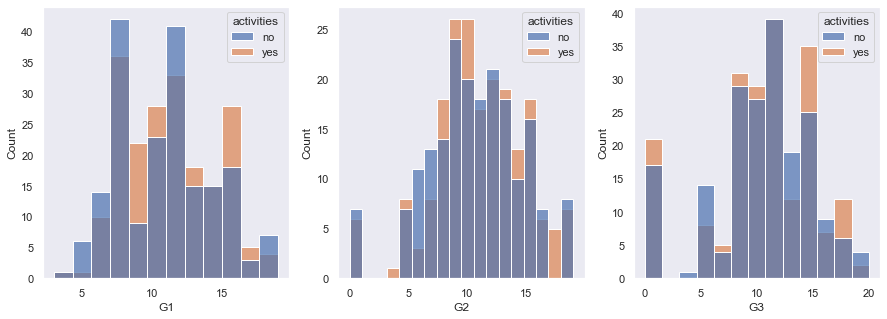

In [53]:
# look at the grade distribution among those with after school activities
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax = ax.ravel()
for i in range(3):
    sns.histplot(data=raw, x=target_columns[i], hue='activities', ax=ax[i], alpha=0.7)

* Do children that have afterschool acitivties do better at math?

In [54]:
raw.groupby('activities').agg({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})

,G1,G2,G3
activities,,,
no,10.716495,10.520619,10.340206
yes,11.094527,10.900498,10.487562


In [55]:
raw.groupby('activities').agg({'G1': 'median', 'G2': 'median', 'G3': 'median'})

,G1,G2,G3
activities,,,
no,11,11,11
yes,11,11,11


## Preparing Data for Modeling

    1. Binary Indicators

In [39]:
binary_columns = [
    'schoolsup', 'famsup', 'paid', 'activities', 
    'nursery', 'higher', 'internet', 'romantic'
]

binary = lambda x: 1 if x == 'yes'else 0

# convert assigned sex at birth to binary indicator
processed['sex'] = raw['sex'].map(lambda sex: binary(sex))

# convert additional school support to binary indicator
processed['schoolsup'] = raw['schoolsup'].map(lambda status: binary(status))

# convert additional parental support to binary indicator
processed['famsup'] = raw['famsup'].map(lambda family: binary(family))

# convert additional paid support to binary indicator
processed['paid'] = raw['paid'].map(lambda paid: binary(paid))

# convert after school activities to binary indicator
processed['activities'] = raw['activities'].map(lambda activity: binary(activity))

# convert attendance at nursary school to binary indicator
processed['nursery'] = raw['nursery'].map(lambda nursery: binary(nursery))

# convert aspiration towards higher education to binary indicator
processed['higher'] = raw['higher'].map(lambda higher: binary(higher))

# convert access to internet at home to binary indicator
processed['internet'] = raw['internet'].map(lambda internet: binary(internet))

# convert romantic relationship to binary indicator
processed['romantic'] = raw['romantic'].map(lambda romantic: binary(romantic))

# convert parental cohabitation status to binray indicator
processed['divorced'] = raw['Pstatus'].map(lambda status: 1 if status.lower() == 'a' else 0)
processed = processed.drop('Pstatus', axis=1)

# convert address to urban living indidactor
processed['urban'] = raw['address'].map(lambda address: 1 if address.lower() == 'u' else 0)
processed = processed.drop('address', axis=1)

# convert family size to small family indicator
processed['smallfam'] = raw['famsize'].map(lambda address: 1 if address.lower() == 'le3' else 0)
processed = processed.drop('famsize', axis=1)